# Classification of Animals in 10 classes

- 1. Importing libraries

- 2. Loading data
    - 2.1 Reading data
    - 2.2 Splitting data into training and validation sets

- 3. Data preprocessing (normalization, rescailing, etc.)

- 4. Data augmentation

- 5. Model definition

- 6. Model compilation

- 7. Setting callbacks

- 8. Model training

- 9. Model evaluation

- 10. Model saving

- 11. Model loading

# 1. Importing Libraries

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam, SGD
from keras.losses import categorical_crossentropy, SparseCategoricalCrossentropy
import keras.callbacks as callbacks

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

## 2. Loading the dataset

In [2]:
def check_for_files():
    for dirname, _, filenames in os.walk('raw-img/'):
        for filename in filenames:
            print(os.path.join(dirname, filename))
            print("y:", dirname.split('/')[1])

# check_for_files()

raw-img/cane\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg
y: cane
raw-img/cane\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg
y: cane
raw-img/cane\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg
y: cane
raw-img/cane\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg
y: cane
raw-img/cane\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg
y: cane
raw-img/cane\OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg
y: cane
raw-img/cane\OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg
y: cane
raw-img/cane\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg
y: cane
raw-img/cane\OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg
y: cane
raw-img/cane\OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg
y: cane
raw-img/cane\OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg
y: cane
raw-img/cane\OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg
y: cane
raw-img/cane\OIP--6mVvk2SFEi7TxqtyMbdvgHaEK.jpeg
y: cane
raw-img/cane\OIP--6UY_QQC69uZF4CrwEcfUQHaHa.jpeg
y: cane
raw-img/cane\OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg
y: cane
raw-img/cane\OIP--8oCad9Nr69Ol4YEkvXJFQHaNK.jpeg
y: cane
raw-img/cane\OIP--90_fw5Y28UC44KVSPuxdAHaJ3.jpeg
y: cane
raw-img/cane\OIP--9pxEn5HUPsqA38ao3

### Narrowing down the dataset 

Narrowing it down to 1000 images per class (10,000 images in total) for training and 400 images per class (4,000 images in total) for testing.

Quindi, prendo le prime 1000 e le butto in train, le altre 400 in test.

In [3]:
current_path = os.getcwd()
raw_data_path = os.path.join(current_path, 'raw-img')


In [4]:
# Load data
train_data = []
train_labels = []
test_data = []
test_labels = []
labels = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

print("Loading all animal images...")
for label in tqdm(labels):
    path = os.path.join(raw_data_path, label)
    class_num = labels.index(label)
    # the first 1000 images are for training, 400 for testing, the rest will be skipped
    for img in os.listdir(path)[:1000]:
        img_array = plt.imread(os.path.join(path, img))
        #or using numpy:
        train_data.append(img_array)
        train_labels.append(class_num)
    for img in os.listdir(path)[1000:1400]:
        img_array = plt.imread(os.path.join(path, img))
        test_data.append(img_array)
        test_labels.append(class_num)
print("\nDone!")
# X_train = np.array(train_data)
# y_train = np.array(train_labels)
# X_test = np.array(test_data)
# y_test = np.array(test_labels)

Loading all animal images...


100%|██████████| 10/10 [00:47<00:00,  4.76s/it]


Done!


In [5]:
len(train_data), len(train_labels), len(test_data), len(test_labels)

(10000, 10000, 4000, 4000)

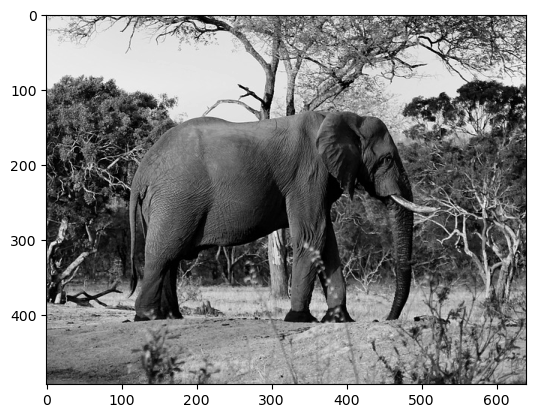

In [6]:
plt.imshow(train_data[2079], cmap='gray')

In [7]:
new_train_data = []
for i in tqdm(range(len(train_data))):
    try:
        image = train_data[i]
        # if len(image.shape) == 2:
        #     print("Shape:", image.shape)
        #     image = np.expand_dims(image, axis=-1)  # Add channel dimension
        #     image = np.concatenate([image] * 3, axis=-1)
        #     print("New shape:", image.shape)
        # if image.shape[2] != 3:
            # print("Error at i:", i)
            # print("Shape:", image.shape)
            # image = image[:, :, :3]
            # print("New shape:", image.shape)
        image = image[:, :, :3]
        new_train_data.append(tf.image.resize(train_data[i], [224, 224]))
        # if image.shape[2] != 3:
        #     print("Error at i:", i)
        #     print("Shape:", image.shape)
    except Exception as e:
        print("Error at i:", i, e)
        # # If the image is grayscale, convert it to RGB format   
        # image = train_data[i]
        # print("Error at i:", i)
        print("Shape:", image.shape)
        new_image = np.expand_dims(image, axis=-1)  # Add channel dimension
        new_image = np.concatenate([new_image] * 3, axis=-1)
        print("New shape:", new_image.shape)
        # # new_train_data.append(tf.image.resize(train_data[i], [224, 224]))
        # print("Expanded dim to following shape:", new_image.shape)
        # # new_image = train_data[i][:, :, :3]
        new_train_data.append(tf.image.resize(new_image, [224, 224]))
# new_train_data = np.array(new_train_data)


 22%|██▏       | 2235/10000 [00:02<00:07, 1005.78it/s]

Error at i: 2079 too many indices for array: array is 2-dimensional, but 3 were indexed
Shape: (493, 640)
New shape: (493, 640, 3)


100%|██████████| 10000/10000 [00:13<00:00, 763.41it/s]


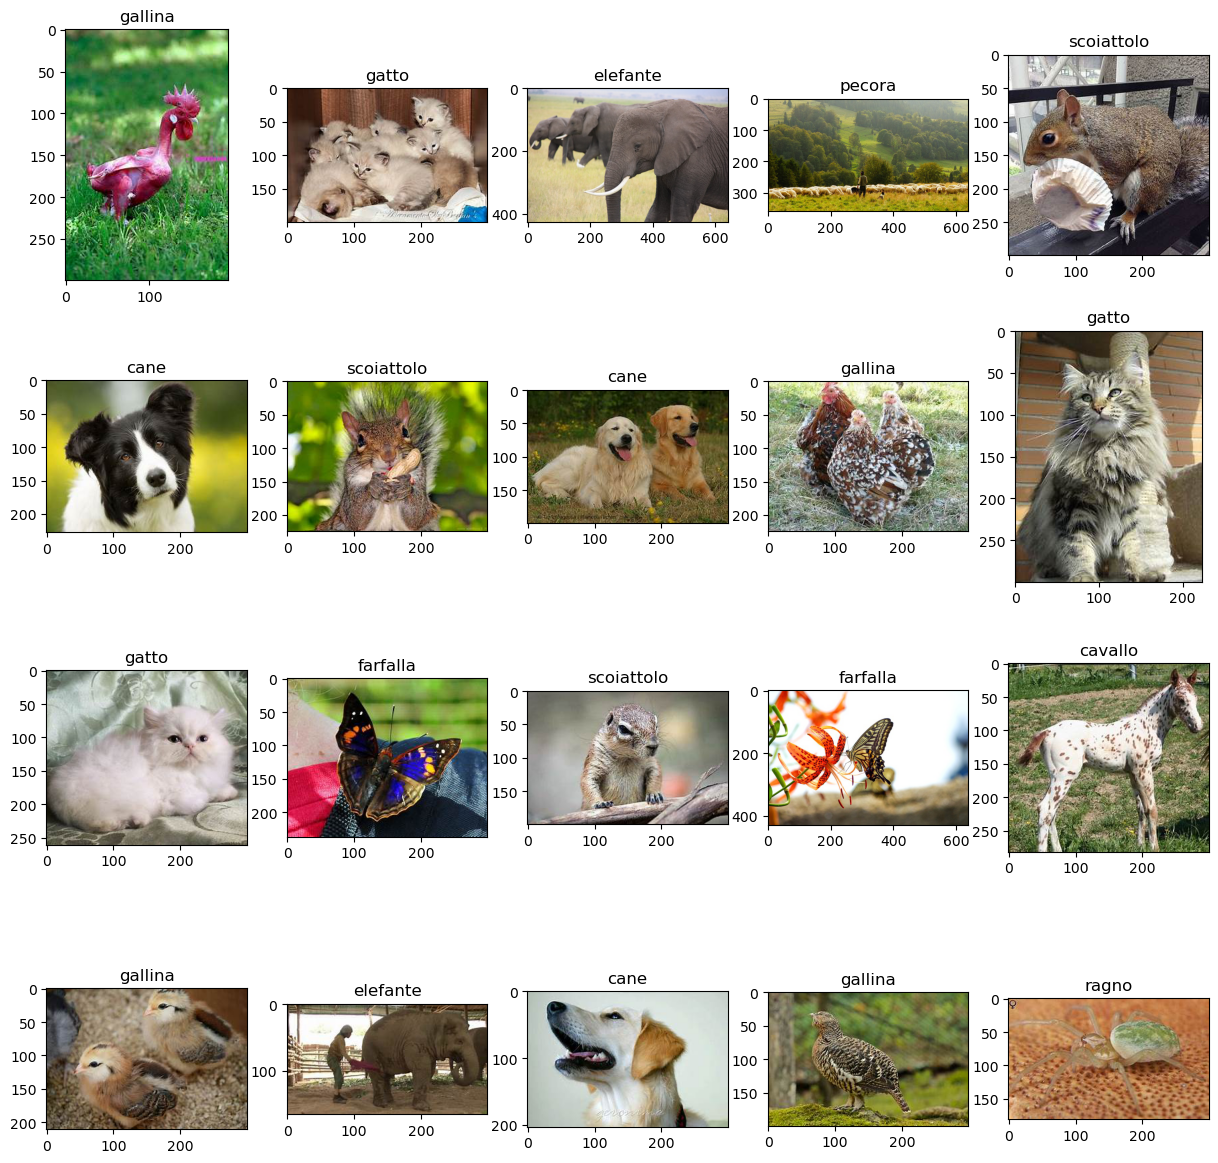

In [8]:
indeces = []
for _ in range(20):
    idx = random.randint(0, len(train_data))
    indeces.append(idx)

fig, axes = plt.subplots(4, 5, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_data[indeces[i]])
    ax.set_title(labels[train_labels[indeces[i]]])

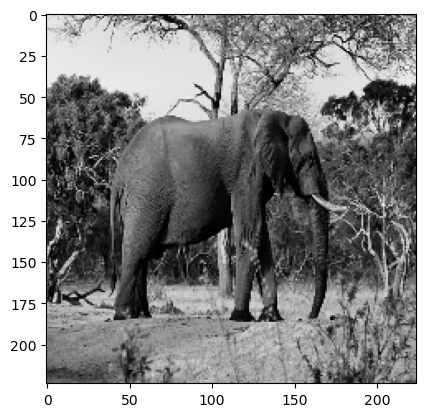

In [9]:
x = np.array(new_train_data[2079], dtype=int)
x.shape
plt.imshow(x)

In [10]:
shpaes = []
for i in range(len(new_train_data)):
    shpaes.append(np.array(new_train_data[i].shape))
shpaes

weird_shapes_idxs = []
for i, el in enumerate(shpaes):
    if el[2] != 3:
        weird_shapes_idxs.append(i)
        print(i, el)

len(weird_shapes_idxs)

for i in weird_shapes_idxs:
    new_train_data[i] = new_train_data[i][:, :, :3]

2043 [224 224   4]
2044 [224 224   4]
2045 [224 224   4]
2046 [224 224   4]
2086 [224 224   4]
2120 [224 224   4]
2121 [224 224   4]
2122 [224 224   4]
2290 [224 224   4]
3008 [224 224   4]
3009 [224 224   4]
3010 [224 224   4]
3020 [224 224   4]
3053 [224 224   4]
3112 [224 224   4]
3214 [224 224   4]
3299 [224 224   4]
3308 [224 224   4]
3378 [224 224   4]
3380 [224 224   4]
3381 [224 224   4]
3388 [224 224   4]
3389 [224 224   4]
3390 [224 224   4]
3391 [224 224   4]
3394 [224 224   4]
3395 [224 224   4]
3396 [224 224   4]
3399 [224 224   4]
3400 [224 224   4]
3401 [224 224   4]
3402 [224 224   4]
3403 [224 224   4]
3404 [224 224   4]
3405 [224 224   4]
3406 [224 224   4]
3407 [224 224   4]
3410 [224 224   4]
3420 [224 224   4]
3421 [224 224   4]
3422 [224 224   4]
3423 [224 224   4]
3424 [224 224   4]
3425 [224 224   4]
3433 [224 224   4]
3435 [224 224   4]
3436 [224 224   4]
3437 [224 224   4]
8284 [224 224   4]


(224, 224, 3)


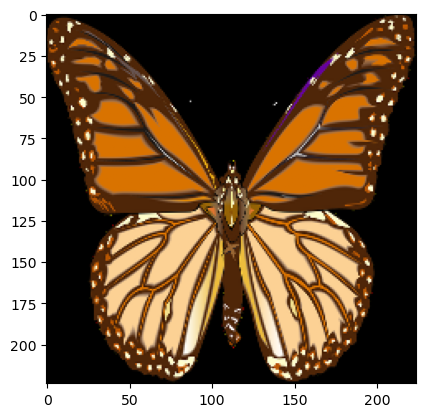

In [12]:
img = new_train_data[weird_shapes_idxs[15]]
img = img[:, :, :3]
print(img.shape)
plt.imshow(img)

## 3. Data Preprocessing

162.62233086419752

## 4. Data Augmentation

In [ ]:

# import albumentations as A

# data_transformation = A.Compose([
#     A.Resize(width=224, height=224),
#     A.RandomBrightnessContrast(p=0.2),
#     A.HorizontalFlip(p=0.5),
#     A.Rotate(limit=30, p=0.5)
# ])


# def transform_image(image):
#     return data_transformation(image=image)['image']


In [13]:

# implement data augmentation in keras
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5]
)

## 5. Building the model

In [14]:
vgg16_model = Sequential(
    [
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Flatten(),
        
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        
        Dense(10, activation='softmax')
    ]
)

vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
vgg19_model = Sequential(
    [
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Flatten(),
        
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        
        Dense(10, activation='softmax')
        # Dense(6000, activation='relu'),
        # Dropout(0.5),
        # Dense(10, activation='softmax')
    ]
)

vgg19_model.summary()

## 6. Model compilation

In [15]:
# Callbacks
# 1. ModelCheckpoint
# 2. EarlyStopping
# 3. ReduceLROnPlateau
# 4. TensorBoard

callbacks_list = [
    callbacks.ModelCheckpoint(

        'mango.ckpt',
        monitor = 'Accuracy',
        save_best_only = True,
        mode = 'auto',
        save_freq='epoch'

        # filepath='models/vgg16_model.{epoch:02d}-{val_loss:.2f}.h5',
        # monitor='val_loss',
        # save_best_only=True
        
    ),
    callbacks.EarlyStopping(
        monitor='Accuracy',
        min_delta=0.0001,
        patience=5,
        restore_best_weights=True,

        # monitor='val_loss',
        # patience=5
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5
    ),
    # callbacks.TensorBoard(
    #     log_dir='logs/vgg16_model',
    #     histogram_freq=1,
    #     write_graph=True,
    #     write_grads=True,
    #     batch_size=32,
    #     write_images=True
    # )
]

In [16]:
vgg16_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    # loss=categorical_crossentropy,
    loss=SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
vgg19_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

## 7. Model Training

In [17]:
for idx, img in enumerate(new_train_data):
    if img.shape[2] != 3 or img.shape[1] != 224 or img.shape[0] != 224:
        print(img.shape)
        print(idx)

In [18]:
train_labels = np.array(train_labels)
new_train_data = np.array(new_train_data)
train_labels.shape, new_train_data.shape

((10000,), (10000, 224, 224, 3))

In [ ]:
# how to import datagen.flow()
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images randomly by 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by 10% of the width
    height_shift_range=0.1,  # Shift images vertically by 10% of the height
    shear_range=0.2,  # Apply shear transformation randomly
    zoom_range=0.2,  # Zoom images randomly by 20%
    horizontal_flip=True,  # Flip images horizontally randomly
    fill_mode='nearest'  # Fill any new pixels created during transformations with the nearest pixel value
)

In [ ]:
# saving datagen.flow() output into a variable
# it will generate batches of randomly transformed images
# and save the results to the 'preview/' directory
result = datagen.flow(new_train_data, train_labels, batch_size=32, save_to_dir='preview/', save_prefix='mango', save_format='jpeg')

In [19]:

history = vgg16_model.fit(
    datagen.flow(new_train_data, train_labels, batch_size=32),
    epochs=2,
    validation_data=(test_data, test_labels),
    callbacks=callbacks_list
)


Epoch 1/2
 33/313 [==>...........................] - ETA: 1:15:48 - loss: 2.4316 - accuracy: 0.1136

KeyboardInterrupt: 

In [ ]:
#plotting the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 8. Model Evaluation

## 9. Model Prediction

## 10. Saving the model

## 11. Loading the model

# The end